In [1613]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [1614]:
df = pd.read_csv('/Users/PANKAJ/Desktop/Used_car_price_dataset.csv')

In [1615]:
df.shape

(4340, 8)

#  EXPLORATORY DATA ANALYSIS

In [1616]:
df.info()
#There are no null values as such for any field in this dataset as shown by above output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Kms_Driven     4340 non-null   int64 
 4   Fuel_Type      4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [1617]:
# Further confirmation of absence of NULL values.
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [1618]:
df.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [1619]:
# Looking for Unique values for each field in the dataset.
df.nunique()

Car_Name         1491
Year               29
Selling_Price     445
Kms_Driven        770
Fuel_Type           5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [1620]:
# To describe the data types of each Column.
df.dtypes

Car_Name         object
Year              int64
Selling_Price     int64
Kms_Driven        int64
Fuel_Type        object
Seller_Type      object
Transmission     object
Owner            object
dtype: object

# Value count for categorical data.

In [1621]:
# Displaying non-numerical features
df.select_dtypes(exclude="number").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


In [1622]:
# Describing non-numerical features
df.describe(exclude="number").head()
# Car_Name field has got many unique values.

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2149,3244,3892,2833


In [1623]:
print(df['Car_Name'].nunique())
print(df['Car_Name'].value_counts())

1491
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Car_Name, Length: 1491, dtype: int64


In [1624]:
df['Fuel_Type'].value_counts()

Diesel      2149
Petrol      2122
CNG           40
LPG           23
Electric       6
Name: Fuel_Type, dtype: int64

In [1625]:
df['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [1626]:
df['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [1627]:
df['Owner'].value_counts()

First Owner             2833
Second Owner            1106
Third Owner              303
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

# Gaining insights into the distribution of numerical variables through Histograms

In [1628]:
# To describe the numerical fields in the dataset.
df.describe()
# Looks like Kms_Driven field has got larger range of values.

,Year,Selling_Price,Kms_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.096774,5.043381e+05,66195.040092
std,4.215757,5.785445e+05,46649.084846
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2022.000000,8.900000e+06,806599.000000


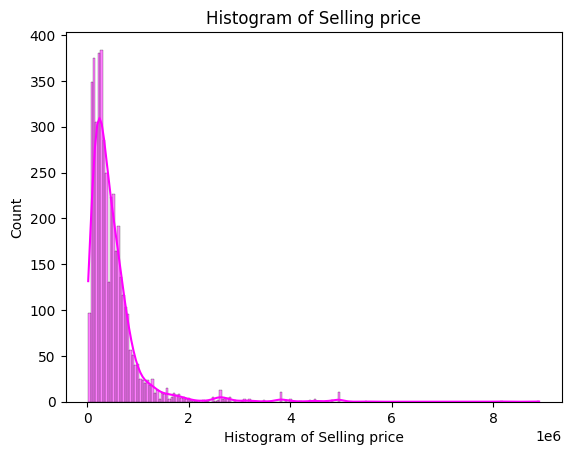

In [1629]:
sns.histplot(data=df, x='Selling_Price', kde=True,color = 'magenta')

# To set plot title and labels
plt.title('Histogram of Selling price')
plt.xlabel('Histogram of Selling price')
plt.ylabel('Count')

# To display the plot
plt.show()

In [1630]:
# Calculate skewness
selling_price = df['Selling_Price']

selling_price_skewness = skew(selling_price)

# Interpret skewness
if selling_price_skewness > 0:
    print("Positive skewness: The selling price data is right-skewed.")
elif selling_price_skewness < 0:
    print("Negative skewness: The selling price data is left-skewed.")
else:
    print("Zero skewness: The selling price data is symmetric.")

# Print the skewness value
print("Skewness:", selling_price_skewness)


Positive skewness: The selling price data is right-skewed.
Skewness: 4.889573998292693


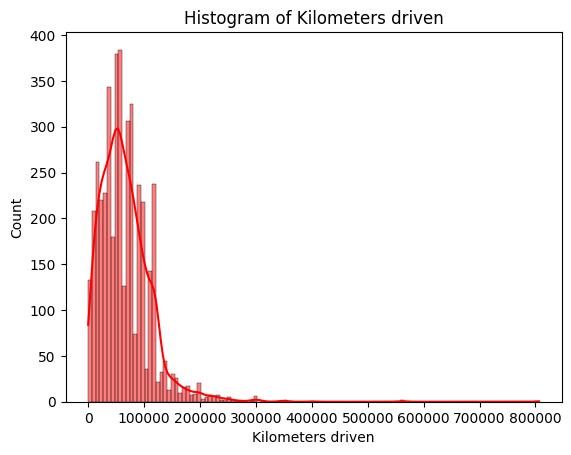

In [1631]:
sns.histplot(data=df, x='Kms_Driven', kde=True, color = 'red')

# To set plot title and labels
plt.title('Histogram of Kilometers driven')
plt.xlabel('Kilometers driven')
plt.ylabel('Count')

# To display the plot
plt.show()

In [1632]:
# Calculate skewness
selling_price = df['Kms_Driven']

selling_price_skewness = skew(selling_price)

# Interpret skewness
if selling_price_skewness > 0:
    print("Positive skewness: The Kms_Driven data is right-skewed.")
elif selling_price_skewness < 0:
    print("Negative skewness: The Kms_Driven data is left-skewed.")
else:
    print("Zero skewness: The Kms_Driven data is symmetric.")

# Print the skewness value
print("Skewness:", selling_price_skewness)

Positive skewness: The Kms_Driven data is right-skewed.
Skewness: 2.6681223880939084


In [1633]:
df.corr()

,Year,Selling_Price,Kms_Driven
Year,1.000000,0.413963,-0.419624
Selling_Price,0.413963,1.000000,-0.192348
Kms_Driven,-0.419624,-0.192348,1.000000


## Feature construction.

In [1634]:
# EXTRACTING THE AGE OF CAR FROM GIVEN DATASET.
current_year=2023

In [1635]:
df['Car_age']=current_year-df['Year']
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,7


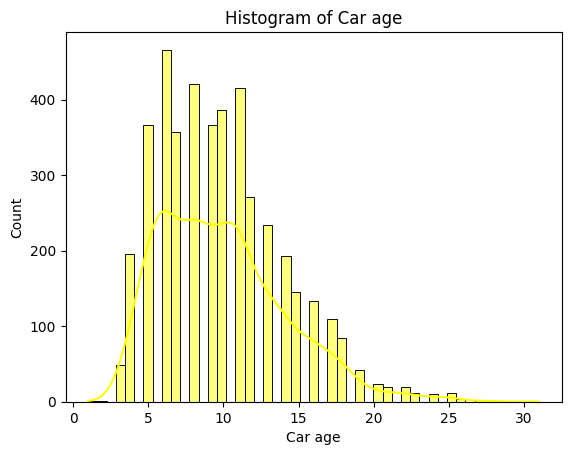

In [1636]:
sns.histplot(data=df, x='Car_age', kde=True, color = 'yellow')

# To set plot title and labels
plt.title('Histogram of Car age')
plt.xlabel('Car age')
plt.ylabel('Count')

# To display the plot
plt.show()

In [1637]:
# EXTRACTING BRAND OF THE CAR
df['Car_Brand']=df.Car_Name.str.split(n=1).str[0]
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


In [1638]:
df['Car_Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Car_Brand, dtype: int64

In [1639]:
df['Car_Brand'].nunique()

29

In [1640]:
# Mapping values for Fuel Efficiency

#fuel type influences fuel efficiency due to differences in energy density and combustion characteristics, while 
#transmission type affects fuel efficiency by allowing drivers to optimize engine performance through manual gear 
#shifting. Combining a diesel engine (higher energy density) with a manual transmission (greater control over gear shifting) often results in higher fuel efficiency compared to other combinations.

fuel_efficiency_map = {
    ('Diesel', 'Manual'): 1,
    ('Petrol', 'Manual'): 0.8,
    ('Petrol', 'Automatic'): 0.6,
    
}

# Create the new feature
df['Fuel_Efficiency'] = df.apply(lambda row: fuel_efficiency_map.get((row['Fuel_Type'], row['Transmission']), 0), axis=1)


In [1641]:
# Create the new feature 'Previous_Ownership'
df['Previous_Ownership'] = df['Owner'].apply(lambda x: 1 if x == 'First Owner' else 0)


In [1642]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_age', 'Car_Brand',
       'Fuel_Efficiency', 'Previous_Ownership'],
      dtype='object')

# Treatment of outliers for Numerical variable

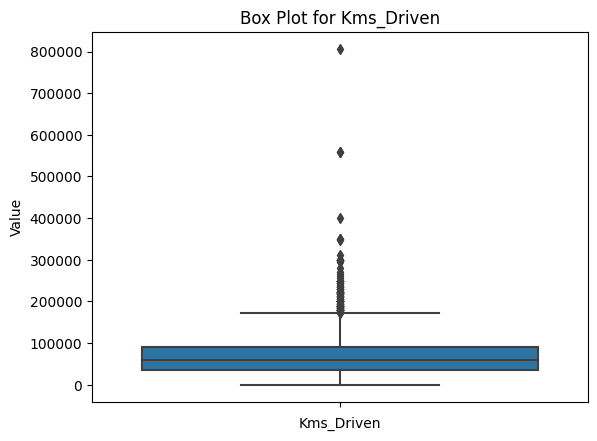

In [1643]:
# Box plot for Kms_Driven
sns.boxplot(data=df, y='Kms_Driven')

# To set plot title and labels
plt.title('Box Plot for Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1644]:
# Outlier detection for Kms_Driven.
q1 = df['Kms_Driven'].quantile(0.25)
q3 = df['Kms_Driven'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['Kms_Driven'] < lower_bound) | (df['Kms_Driven'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 35000.0
Quartile 3 (Q3): 90000.0
Interquartile Range (IQR): 55000.0
Lower Bound for Outliers: -47500.0
Upper Bound for Outliers: 172500.0
Number of Outliers: 110


In [1645]:
df['Kms_Driven']=df['Kms_Driven'].clip(101,172500)
##The clip() function is a convenient method in pandas that limits the values of a Series or DataFrame column 
##to a specified range. 

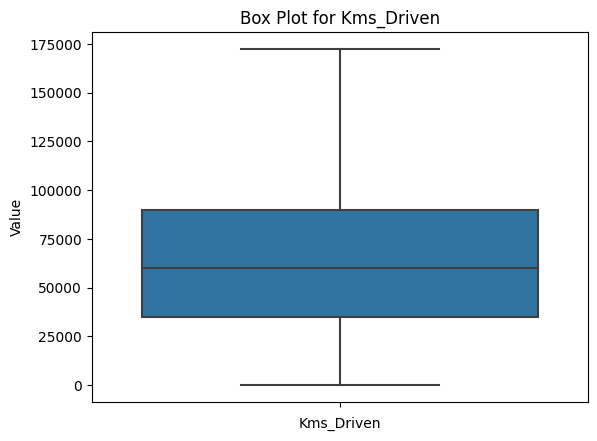

In [1646]:
# Box plot for Kms_Driven post outlier removal
sns.boxplot(data=df, y='Kms_Driven')

# To set plot title and labels
plt.title('Box Plot for Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Value')

# To display the plot
plt.show()

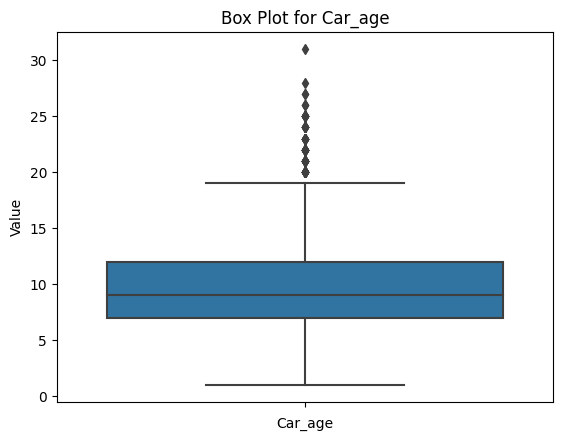

In [1647]:
# Box plot for Car_age

sns.boxplot(data=df, y='Car_age')

# To set plot title and labels
plt.title('Box Plot for Car_age')
plt.xlabel('Car_age')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1648]:
# Outlier detection for Car_age.
q1 = df['Car_age'].quantile(0.25)
q3 = df['Car_age'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['Car_age'] < lower_bound) | (df['Car_age'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 7.0
Quartile 3 (Q3): 12.0
Interquartile Range (IQR): 5.0
Lower Bound for Outliers: -0.5
Upper Bound for Outliers: 19.5
Number of Outliers: 104


In [1649]:
df['Car_age']=df['Car_age'].clip(4,19)

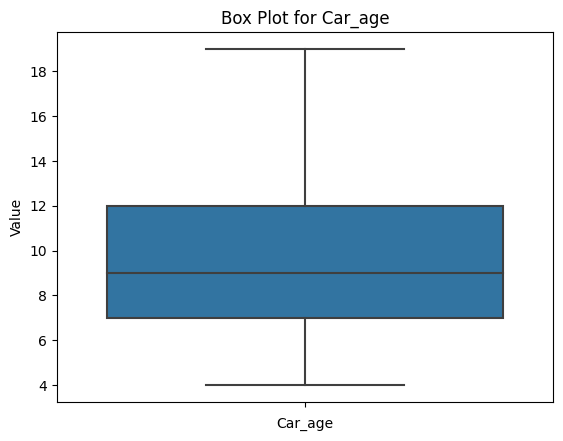

In [1650]:
# Box plot for Car_age post outlier removal.
sns.boxplot(data=df, y='Car_age')

# To set plot title and labels
plt.title('Box Plot for Car_age')
plt.xlabel('Car_age')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1651]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_age', 'Car_Brand',
       'Fuel_Efficiency', 'Previous_Ownership'],
      dtype='object')

In [1652]:
# Dropping Car_Name and Year fields.
df.drop(['Year'], axis =1, inplace = True)
df.drop(['Car_Name'], axis =1, inplace = True)
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand', 'Fuel_Efficiency',
       'Previous_Ownership'],
      dtype='object')

In [1653]:
#Pairplot to find the relation between different variables.

dff = df[['Selling_Price','Car_Brand', 'Car_age', 'Kms_Driven', 'Fuel_Type','Seller_Type', 'Transmission', 'Owner']]
fig_pairplot = px.scatter_matrix(dff, height=1000,title= 'Correlation between different fields for whole Data')  
fig_pairplot

In [1654]:
df.corr()

,Selling_Price,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership
Selling_Price,1.000000,-0.216766,-0.424470,-0.435451,0.223798
Kms_Driven,-0.216766,1.000000,0.486253,0.165266,-0.343701
Car_age,-0.424470,0.486253,1.000000,0.059385,-0.446096
Fuel_Efficiency,-0.435451,0.165266,0.059385,1.000000,-0.058197
Previous_Ownership,0.223798,-0.343701,-0.446096,-0.058197,1.000000


In [1655]:
df.isna().sum()
# No NULL values are there.

Selling_Price         0
Kms_Driven            0
Fuel_Type             0
Seller_Type           0
Transmission          0
Owner                 0
Car_age               0
Car_Brand             0
Fuel_Efficiency       0
Previous_Ownership    0
dtype: int64

In [1656]:
df.shape

(4340, 10)

In [1657]:
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand', 'Fuel_Efficiency',
       'Previous_Ownership'],
      dtype='object')

In [1658]:
df

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,1.0,1
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,0.8,1
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti,0.8,0
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai,1.0,1


# Applying different correlations

In [1659]:
#Cramer's V
#Cramer's V is a measure of association used to determine the strength of the relationship between two categorical variables. 
! pip install association_metrics
import association_metrics as am
data=df.apply(lambda x : x.astype("category") if x.dtype=="O" else x)
cramers_v=am.CramersV(data)
cfit=cramers_v.fit().round(2)
cfit
# Car Brand and Transmission are highly correlated (0.58)

,Fuel_Type,Seller_Type,Transmission,Owner,Car_Brand
Fuel_Type,1.00,0.04,0.07,0.03,0.28
Seller_Type,0.04,1.00,0.21,0.21,0.24
Transmission,0.07,0.21,1.00,0.09,0.58
Owner,0.03,0.21,0.09,1.00,0.14
Car_Brand,0.28,0.24,0.58,0.14,1.00


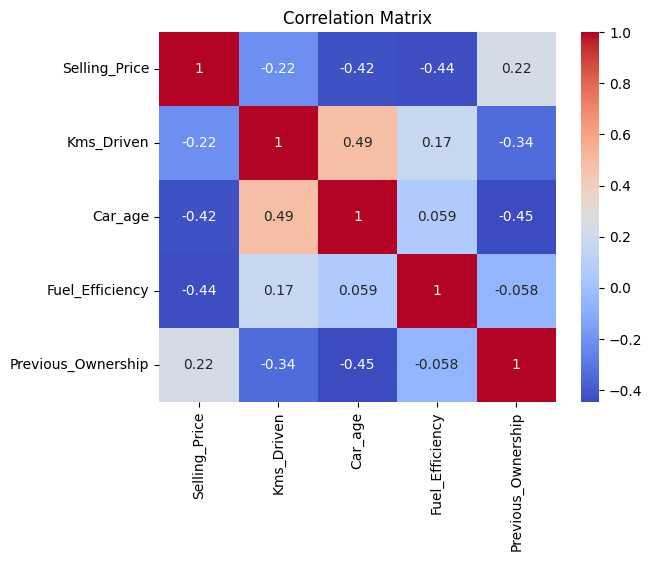

In [1660]:
# Creating a correlation matrix heatmap
#Since the heatmap is based on the correlation coefficients, it is most commonly used for numerical variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#The cmap='coolwarm' parameter sets the color scheme for the heatmap to range from cool colors (e.g., blue) for negative correlations to warm colors (e.g., red) for positive correlations.


In [1661]:
import plotly.graph_objects as go #just another way to show plot correlation between numerical variables.
corr = df.corr()
fig = px.imshow(corr, text_auto=True)
fig.update_layout(title_text="Correlation Plot")
fig.show()

# Spearman Correlation

In [1662]:
df.corr(method='spearman')
#Selling_Price has a negative correlation with Kms_Driven (-0.32) and Car_age (-0.70). Kms_Driven has a positive correlation with Car_age (0.57), suggesting that as the number of kilometers driven increases, the age of the car also tends to increase.

,Selling_Price,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership
Selling_Price,1.000000,-0.324119,-0.696034,0.076376,0.349434
Kms_Driven,-0.324119,1.000000,0.568774,0.306255,-0.370276
Car_age,-0.696034,0.568774,1.000000,0.026603,-0.453266
Fuel_Efficiency,0.076376,0.306255,0.026603,1.000000,-0.053073
Previous_Ownership,0.349434,-0.370276,-0.453266,-0.053073,1.000000


In [1663]:
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand', 'Fuel_Efficiency',
       'Previous_Ownership'],
      dtype='object')

In [1664]:
df

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,1.0,1
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,0.8,1
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti,0.8,0
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai,1.0,1


In [1665]:
df1 = df.copy()
df1

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,1.0,1
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,0.8,1
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti,0.8,0
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai,1.0,1


In [1666]:
df1.shape

(4340, 10)

# VIF

In [1667]:
df3 = df.copy()
df3.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,1.0,1
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,0.8,1
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,1.0,0


In [1668]:
from sklearn import preprocessing
#Label encoding is a process of assigning unique numerical labels to categorical variables. Each category is assigned a unique integer value.

label_encoder = preprocessing.LabelEncoder()
# Encode labels for finding out VIF.
df3['Fuel_Type']= label_encoder.fit_transform(df3['Fuel_Type'])
df3['Transmission'] = label_encoder.fit_transform(df3['Transmission'])
df3['Seller_Type'] = label_encoder.fit_transform(df3['Seller_Type'])
df3['Owner'] = label_encoder.fit_transform(df3['Owner'])
df3['Car_age'] = label_encoder.fit_transform(df3['Car_age'])
df3['Car_Brand'] = label_encoder.fit_transform(df3['Car_Brand'])
df3['Fuel_Efficiency'] = label_encoder.fit_transform(df3['Fuel_Efficiency'])
df3['Previous_Ownership'] = label_encoder.fit_transform(df3['Previous_Ownership'])

In [1669]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

a,b = dmatrices('Selling_Price ~ Kms_Driven + Fuel_Type + Seller_Type + Transmission + Owner + Car_age + Car_Brand+ Fuel_Efficiency + Previous_Ownership', data=df3, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['variable'] = b.columns

vif
#Owner and Previous_Ownership have higher but less than 10 VIF.

,VIF,variable
0,50.907398,Intercept
1,1.672124,Kms_Driven
2,1.783134,Fuel_Type
3,1.087563,Seller_Type
4,2.924127,Transmission
5,5.947123,Owner
6,1.648928,Car_age
7,1.053768,Car_Brand
8,3.383112,Fuel_Efficiency
9,6.103083,Previous_Ownership


In [1670]:
df3.corr(method='spearman')

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
Selling_Price,1.000000,-0.324119,-0.358763,-0.170312,-0.350375,-0.343768,-0.696034,-0.064329,0.076376,0.349434
Kms_Driven,-0.324119,1.000000,-0.308185,0.150232,0.142772,0.367913,0.568774,0.104376,0.306255,-0.370276
Fuel_Type,-0.358763,-0.308185,1.000000,0.037420,0.036680,-0.012761,0.069035,-0.071231,-0.663502,0.011905
Seller_Type,-0.170312,0.150232,0.037420,1.000000,0.182671,0.182656,0.096919,0.142282,0.077814,-0.184633
Transmission,-0.350375,0.142772,0.036680,0.182671,1.000000,0.086423,0.159176,0.078526,0.564763,-0.089971
Owner,-0.343768,0.367913,-0.012761,0.182656,0.086423,1.000000,0.447751,0.036449,0.054597,-0.982130
Car_age,-0.696034,0.568774,0.069035,0.096919,0.159176,0.447751,1.000000,0.055735,0.026603,-0.453266
Car_Brand,-0.064329,0.104376,-0.071231,0.142282,0.078526,0.036449,0.055735,1.000000,0.108734,-0.041847
Fuel_Efficiency,0.076376,0.306255,-0.663502,0.077814,0.564763,0.054597,0.026603,0.108734,1.000000,-0.053073
Previous_Ownership,0.349434,-0.370276,0.011905,-0.184633,-0.089971,-0.982130,-0.453266,-0.041847,-0.053073,1.000000


# Important features extraction

In [1671]:
# Train test split.
train,test = train_test_split(df,test_size=0.10,random_state=0)
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

shape of training data :  (3906, 10)
shape of testing data (434, 10)


In [1672]:
##Separating the target and independent variable
train_x = train.drop(columns=['Selling_Price'],axis=1)
train_y = train['Selling_Price']
test_x = test.drop(columns=['Selling_Price'],axis=1)
test_y = test['Selling_Price']

In [1673]:
# Applying Theil's U.
import warnings

# Ignoring specific warning category
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ignoring all warnings
warnings.filterwarnings("ignore")

from scipy.stats import entropy

def theils_u(x, y):
    p_xy = pd.crosstab(x, y, normalize='all')
    p_x = p_xy.sum(axis=1)
    p_y_given_x = p_xy.div(p_x, axis=0)
    p_y = y.value_counts(normalize=True)
    information_value = (p_y_given_x * np.log(p_y_given_x / p_y)).sum().sum()
    entropy_y = entropy(p_y)
    if entropy_y == 0:
        return 1.0
    else:
        return information_value / entropy_y

# Calculating Theil's U for each feature
theils_u_scores = []
for feature in train_x.columns:
    u_score = theils_u(train_x[feature], train_y)
    theils_u_scores.append(u_score)
#theils_u_scores.sort(reverse=True) 
# Print Theil's U scores for each feature
print("\n\nTheil's U scores:")
for feature, score in zip(train_x.columns, theils_u_scores):
    print(f"{feature}: {score}")



Theil's U scores:
Kms_Driven: 650.6658690974624
Fuel_Type: 1.529983145818932
Seller_Type: 0.6142822472577794
Transmission: 0.2333436220253911
Owner: 1.4204445444670557
Car_age: 3.4343484053893314
Car_Brand: 19.470215698100397
Fuel_Efficiency: 0.5855328269040746
Previous_Ownership: 0.07050834623002172


In [1674]:
df3

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,4,1,1,0,12,18,2,1
1,135000,50000,4,1,1,0,12,18,2,1
2,600000,100000,1,1,1,0,7,10,3,1
3,250000,46000,4,1,1,0,2,5,2,1
4,450000,141000,1,1,1,2,5,9,3,0
...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,1,1,1,2,5,10,3,0
4336,409999,80000,1,1,1,2,5,10,3,0
4337,110000,83000,4,1,1,2,10,18,2,0
4338,865000,90000,1,1,1,0,3,10,3,1


In [1675]:
# Performing again the Train test split post label encoding. can't use dummification for feature importance because actual features names get lost.
train1,test1 = train_test_split(df3,test_size=0.10,random_state=0)
print('shape of training data : ',train1.shape)
print('shape of testing data',test1.shape)

##Separating the target and independent variable again
train1_x = train1.drop(columns=['Selling_Price'],axis=1)
train1_y = train1['Selling_Price']
test1_x = test1.drop(columns=['Selling_Price'],axis=1)
test1_y = test1['Selling_Price']

shape of training data :  (3906, 10)
shape of testing data (434, 10)


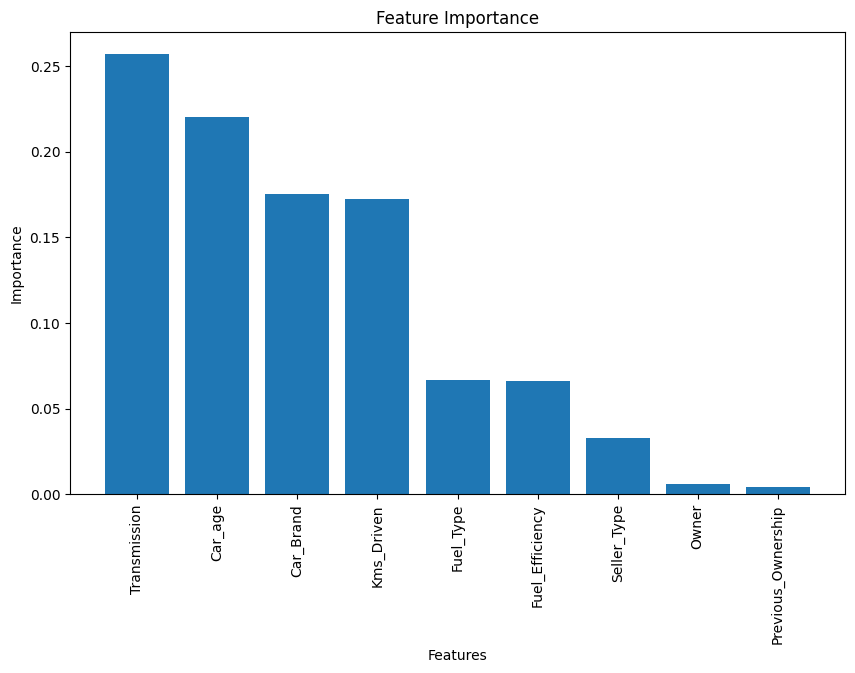

In [1676]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train1_x, train1_y)

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = train1_x.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Dummification

In [1677]:
#Dummification, also known as one-hot encoding, transforms categorical variables into binary vectors. Each category 
#is represented by a binary column (dummy variable) where a value of 1 indicates the presence of that category, and 0 
#indicates its absence. This method creates additional columns, equal to the number of unique categories in the original variable. 


In [1678]:
df2 = df.copy()

In [1679]:
df2

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand,Fuel_Efficiency,Previous_Ownership
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,0.8,1
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,1.0,1
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,0.8,1
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai,1.0,0
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti,0.8,0
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai,1.0,1


In [1680]:
import numpy as np

numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df2.select_dtypes(exclude=np.number).columns.tolist()

In [1681]:
numeric_cols

['Selling_Price',
 'Kms_Driven',
 'Car_age',
 'Fuel_Efficiency',
 'Previous_Ownership']

In [1682]:
categorical_cols

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Brand']

In [1683]:
# Numerical and Categorical features
X_cat = df2[categorical_cols]
X_num = df2[numeric_cols]
X_num.drop(['Selling_Price'], axis =1, inplace = True)  
s = df2['Selling_Price']

In [1684]:
#!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)

X_num_scaled.columns = X_num.columns
X_num_scaled

,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership
0,0.405449,0.800000,0.8,1.0
1,0.289439,0.800000,0.8,1.0
2,0.579464,0.466667,1.0,1.0
3,0.266237,0.133333,0.8,1.0
4,0.817284,0.333333,1.0,0.0
...,...,...,...,...
4335,0.463454,0.333333,1.0,0.0
4336,0.463454,0.333333,1.0,0.0
4337,0.480855,0.666667,0.8,0.0
4338,0.521459,0.200000,1.0,1.0


In [1685]:
df60 = pd.concat([X_cat,X_num_scaled,s], axis=1)
df60

,Fuel_Type,Seller_Type,Transmission,Owner,Car_Brand,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership,Selling_Price
0,Petrol,Individual,Manual,First Owner,Maruti,0.405449,0.800000,0.8,1.0,60000
1,Petrol,Individual,Manual,First Owner,Maruti,0.289439,0.800000,0.8,1.0,135000
2,Diesel,Individual,Manual,First Owner,Hyundai,0.579464,0.466667,1.0,1.0,600000
3,Petrol,Individual,Manual,First Owner,Datsun,0.266237,0.133333,0.8,1.0,250000
4,Diesel,Individual,Manual,Second Owner,Honda,0.817284,0.333333,1.0,0.0,450000
...,...,...,...,...,...,...,...,...,...,...
4335,Diesel,Individual,Manual,Second Owner,Hyundai,0.463454,0.333333,1.0,0.0,409999
4336,Diesel,Individual,Manual,Second Owner,Hyundai,0.463454,0.333333,1.0,0.0,409999
4337,Petrol,Individual,Manual,Second Owner,Maruti,0.480855,0.666667,0.8,0.0,110000
4338,Diesel,Individual,Manual,First Owner,Hyundai,0.521459,0.200000,1.0,1.0,865000


In [1686]:
#Dummification
df60=pd.get_dummies(df60)

In [1687]:
df60

,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,0.8,1.0,60000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,0.8,1.0,135000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,1.0,1.0,600000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,0.8,1.0,250000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,1.0,0.0,450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.463454,0.333333,1.0,0.0,409999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,0.463454,0.333333,1.0,0.0,409999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,0.8,0.0,110000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,1.0,1.0,865000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1688]:
df60.duplicated().sum()


790

In [1689]:
df60.drop_duplicates(inplace=True)

In [1690]:
df60

,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,0.8,1.0,60000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,0.8,1.0,135000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,1.0,1.0,600000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,0.8,1.0,250000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,1.0,0.0,450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.985499,0.466667,1.0,1.0,600000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4335,0.463454,0.333333,1.0,0.0,409999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,0.8,0.0,110000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,1.0,1.0,865000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1691]:
df60.columns

Index(['Kms_Driven', 'Car_age', 'Fuel_Efficiency', 'Previous_Ownership',
       'Selling_Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_First Owner',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner', 'Car_Brand_Ambassador',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Chevrolet',
       'Car_Brand_Daewoo', 'Car_Brand_Datsun', 'Car_Brand_Fiat',
       'Car_Brand_Force', 'Car_Brand_Ford', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jaguar',
       'Car_Brand_Jeep', 'Car_Brand_Kia', 'Car_Brand_Land', 'Car_Brand_MG',
       'Car_Brand_Mahindra', 'Car_Brand_Maruti', 'Car_Brand_Mercedes-Benz',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_OpelCorsa',
       '

# Linear Regression

In [1692]:
from sklearn.model_selection import train_test_split
# Train test split.
train6,test6 = train_test_split(df60,test_size=0.10,random_state=0) #df60 is one hot encoded and concatenated.
print('shape of training data : ',train6.shape)
print('shape of testing data',test6.shape)

shape of training data :  (3195, 49)
shape of testing data (355, 49)


In [1693]:
##Separating the target and independent variable
train6_x = train6.drop(columns=['Selling_Price'],axis=1)
train6_y = train6['Selling_Price']
test6_x = test6.drop(columns=['Selling_Price'],axis=1)
test6_y = test6['Selling_Price']

In [1694]:
# MODEL EVALUATION ON TEST DATA
reg=LinearRegression()
reg.fit(train6_x, train6_y)
pred_test=reg.predict(test6_x)

Lin_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test)), 2)
Lin_R2    = round(r2_score(test6_y, abs(pred_test)), 2)
print('RMSLE is :',Lin_RMSLE)
print('R2 Score is :',Lin_R2 )

RMSLE is : 0.35
R2 Score is : 0.69


In [1695]:
#Root Mean Squared Logarithmic Error (RMSLE) can be a useful metric for certain scenarios, particularly when the 
#target variable (selling price in this case) has a wide range and is skewed. It penalizes underestimation and 
#overestimation proportionally, making it suitable when predicting prices or quantities.

In [1696]:
# With important features.
M = df60[['Kms_Driven', 'Car_age','Car_Brand_Ambassador',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Chevrolet',
       'Car_Brand_Daewoo', 'Car_Brand_Datsun', 'Car_Brand_Fiat',
       'Car_Brand_Force', 'Car_Brand_Ford', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jaguar',
       'Car_Brand_Jeep', 'Car_Brand_Kia', 'Car_Brand_Land', 'Car_Brand_MG',
       'Car_Brand_Mahindra', 'Car_Brand_Maruti', 'Car_Brand_Mercedes-Benz',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_OpelCorsa',
       'Car_Brand_Renault', 'Car_Brand_Skoda', 'Car_Brand_Tata',
       'Car_Brand_Toyota', 'Car_Brand_Volkswagen', 'Car_Brand_Volvo','Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol','Transmission_Automatic',
       'Transmission_Manual', 'Fuel_Efficiency']]
n = df60['Selling_Price']

# Let's split the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.10, random_state= 1000) #(M=X, n=y)

# Creating a Random Forest Classifier model
model100 = LinearRegression()

# Training the model
model100.fit(M_train, n_train)

# Predict
predict100=model100.predict(M_test)

# Score
Lin_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict100)), 2)
Lin_R2_I    = round(r2_score(n_test,abs(predict100)), 2)
print('RMSLE is :',Lin_RMSLE_I)
print('R2 Score is :',Lin_R2_I )

RMSLE is : 0.35
R2 Score is : 0.69


# OLS

In [1697]:
# Add a constant term to the independent variables
#Including a constant term is essential to capture the inherent baseline relationship between the variables. 
#Without the constant term, the regression line would be forced to pass through the origin (0,0), which may not accurately represent the data.
#Adding a constant term also helps in interpreting the coefficients. The constant term represents the expected value of the dependent variable when all independent variables are zero. It allows the regression line to shift up or down to better fit the data.

X_train_const = sm.add_constant(train6_x)
# Fit the OLS regression model
model9 = sm.OLS(train6_y,X_train_const)
results = model9.fit()

# Print the regression results
print(results.summary())
OLS_r_squared = round(results.rsquared,2)
#print(OLS_r_squared)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     139.9
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:57:29   Log-Likelihood:                -44844.
No. Observations:                3195   AIC:                         8.977e+04
Df Residuals:                    3152   BIC:                         9.004e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1698]:
#Kuurtosis and skewness are high indicating distribution of residuals is not normal

In [1699]:
residuals = results.resid

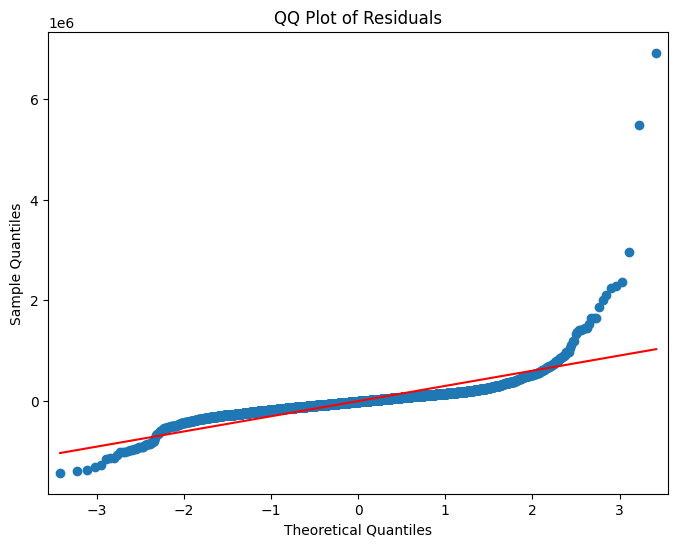

In [1700]:
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as smg

# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
smg.qqplot(residuals, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()

In [1701]:
#OLS using only important features
X_train_const1 = sm.add_constant(M_train)
# Fit the OLS regression model
model90 = sm.OLS(n_train,X_train_const1)
results90 = model90.fit()

# Print the regression results
print(results90.summary())
OLS_r_sq = round(results90.rsquared,2)
#print(OLS_r_squared)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     161.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:57:31   Log-Likelihood:                -44857.
No. Observations:                3195   AIC:                         8.979e+04
Df Residuals:                    3158   BIC:                         9.001e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8

In [1702]:
residuals90 = results90.resid

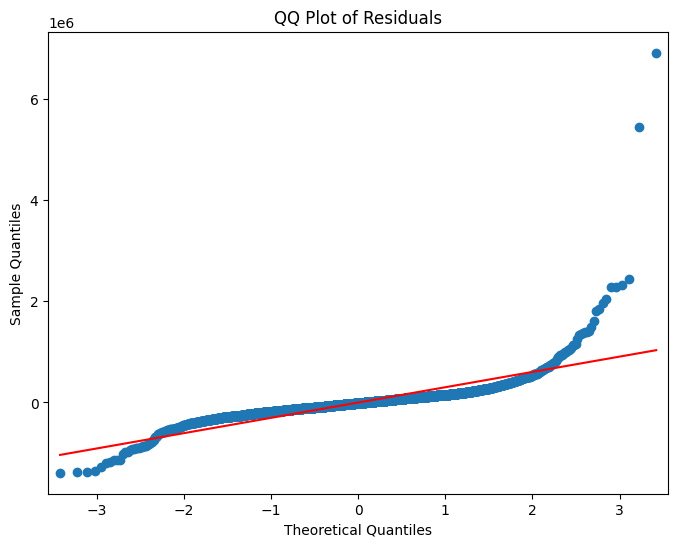

In [1703]:
# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
smg.qqplot(residuals90, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()

In [1704]:
df70 = df60.copy()

In [1705]:
df70

,Kms_Driven,Car_age,Fuel_Efficiency,Previous_Ownership,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,0.8,1.0,60000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,0.8,1.0,135000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,1.0,1.0,600000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,0.8,1.0,250000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,1.0,0.0,450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.985499,0.466667,1.0,1.0,600000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4335,0.463454,0.333333,1.0,0.0,409999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,0.8,0.0,110000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,1.0,1.0,865000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1706]:
# Boxcox Transformation of target variable.
#Train test split (again because we will use train 6,test7 afterwards in other models)
train7,test7 = train_test_split(df70,test_size=0.10,random_state=0)
print('shape of training data : ',train7.shape)
print('shape of testing data',test7.shape)
##Separating the target and independent variable
train7_x = train7.drop(columns=['Selling_Price'],axis=1)
train7_y = train7['Selling_Price']
test7_x = test7.drop(columns=['Selling_Price'],axis=1)
test7_y = test7['Selling_Price']

shape of training data :  (3195, 49)
shape of testing data (355, 49)


In [1707]:
import scipy.stats as stats
#transformed_data, lambda_value = stats.boxcox(data)
train7_y_t, lambda_ = stats.boxcox(train7_y)
test7_y_t, lambda_ = stats.boxcox(test7_y)

In [1708]:
# Applying OLS post Box cox transformation
X_train_const = sm.add_constant(train7_x)
# Fit the OLS regression model
model9 = sm.OLS(train7_y_t,X_train_const)
results1 = model9.fit()

# Print the regression results
print(results1.summary())
OLS_r_squared_boxcox = round(results1.rsquared,2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     271.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:57:33   Log-Likelihood:                -1936.6
No. Observations:                3195   AIC:                             3959.
Df Residuals:                    3152   BIC:                             4220.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

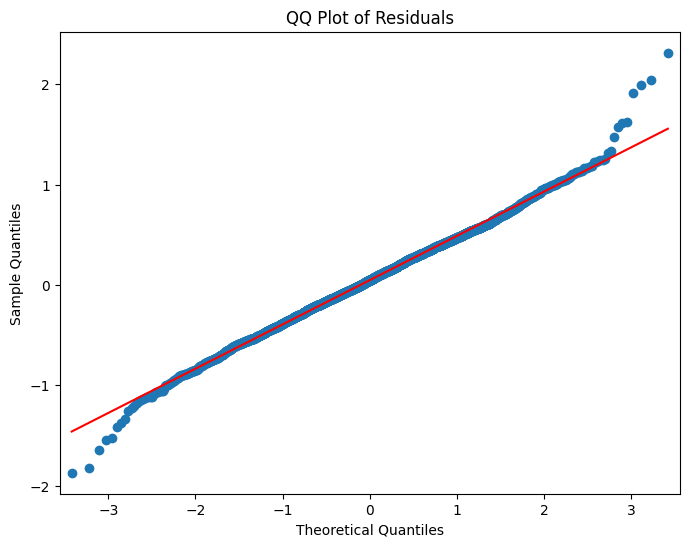

In [1709]:
residuals1 = results1.resid
# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
smg.qqplot(residuals1, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()
#A QQ plot is a graphical tool used to check if a dataset follows a particular theoretical distribution, like the 
#normal distribution. It compares the quantiles of the observed data with the quantiles of the expected distribution. 
#By examining the points on the plot, we can determine if the data aligns with the expected distribution or deviates from it. This helps in assessing the suitability of a distribution assumption and detecting any unusual patterns or outliers in the data.

# Ridge Regression

# Even with a small number of predictors, Lasso and Ridge regularization can still provide benefits in terms of model regularization, and managing the bias-variance tradeoff. 

In [1710]:
ridge = Ridge(alpha=0.05)
ridge.fit(train6_x, train6_y)

Ridge(alpha=0.05)

In [1711]:
# MODEL EVALUATION ON TEST DATA
pred_test_ridge=ridge.predict(test6_x)

Ridge_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_ridge)), 2)
Ridge_R2    = round(r2_score(test6_y, abs(pred_test_ridge)), 2)
print('RMSLE is :',Ridge_RMSLE)
print('R2 Score is :',Ridge_R2 )

RMSLE is : 0.35
R2 Score is : 0.69


In [1712]:
# Model Evaluation using only important features

model200 = Ridge(alpha=0.05)

# Training the model
model200.fit(M_train, n_train)

# Predict
predict200=model200.predict(M_test)

# Score
Ridge_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict200)), 2)
Ridge_R2_I    = round(r2_score(n_test,abs(predict200)), 2)
print('RMSLE is :',Ridge_RMSLE_I)
print('R2 Score is :',Ridge_R2_I )

RMSLE is : 0.35
R2 Score is : 0.69


# Lasso Regression

In [1713]:
lasso = Lasso(alpha=0.05)
lasso.fit(train6_x,train6_y)
pred_test_lasso=lasso.predict(test6_x)
pred_train_lasso=lasso.predict(train6_x)

In [1714]:
# MODEL EVALUATION ON TEST DATA
Lasso_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_lasso)), 2)
Lasso_R2    = round(r2_score(test6_y, abs(pred_test_ridge)), 2)
print('RMSLE is :',Lasso_RMSLE)
print('R2 Score is :',Lasso_R2)

RMSLE is : 0.35
R2 Score is : 0.69


In [1715]:
# Model Evaluation using only important features
model300 = Lasso(alpha=0.05)
model300.fit(M_train, n_train)

# Training the model
model300.fit(M_train, n_train)

# Predict
predict300=model300.predict(M_test)

# Score
Lasso_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict300)), 2)
Lasso_R2_I    = round(r2_score(n_test,abs(predict300)), 2)
print('RMSLE is :',Lasso_RMSLE_I)
print('R2 Score is :',Lasso_R2_I )

RMSLE is : 0.35
R2 Score is : 0.69


# Decision tree regressor

In [1606]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(train6_x,train6_y)
DTR=round(dt_regressor.score(test6_x, test6_y),2)
print(DTR)


0.54


In [1716]:
dt_regressor.tree_.max_depth

30

In [1717]:
# Predicting on the test data
predictions = dt_regressor.predict(test6_x)

# Calculating RMSLE
rmsle_dtr = round(np.sqrt(mean_squared_log_error(test6_y, predictions)),2)



print('RMSLE:', rmsle_dtr)


RMSLE: 0.51


In [1718]:
#with important features
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(M_train, n_train)

# Predicting on the test data
predictions = dt_regressor.predict(M_test)

# Calculating RMSLE
rmsle_dtr1 = round(np.sqrt(mean_squared_log_error(n_test, predictions)),2)

# Calculating the coefficient of determination (R-squared score)
DTR_I = round(dt_regressor.score(M_test, n_test),2)

print('RMSLE:', rmsle_dtr1)
print('Score:', DTR_I)


RMSLE: 0.42
Score: 0.7


# Random Forest Regressor

In [1720]:
rf=RandomForestRegressor(n_estimators=100,random_state=15)
rf.fit(train6_x, train6_y)
pred_test_rf= rf.predict(test6_x)

RFR_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_rf)), 2)
RFR_R2    = round(r2_score(test6_y, pred_test_rf), 2)
print('RMSLE is :',RFR_RMSLE)
print('R2 Score is :',RFR_R2)

RMSLE is : 0.16
R2 Score is : 0.77


In [1721]:
# With only important features.

model402 = RandomForestRegressor(n_estimators=100,random_state=0)

# Training the model
model402.fit(M_train, n_train)

# Predict
predict402=model402.predict(M_test)

# Score
RFR_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict402)), 2)
RFR_R2_I    = round(r2_score(n_test,abs(predict402)), 2)
print('RMSLE is :',RFR_RMSLE_I)
print('R2 Score is :',RFR_R2_I  )

RMSLE is : 0.15
R2 Score is : 0.73


In [1725]:
# Using Optuna for hyperparameter tuning.
#!pip install optuna


# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(train6_x, train6_y)

    # Predicting on the test data
    predict = model.predict(test6_x)

    # Calculating and returning the R2 score
    accuracy = r2_score(test6_y,abs(predict))
    return accuracy

    # Calculating the RMSLE
    rmsle = mean_squared_log_error(test6_y, abs(predict)) ** 0.5

    # Returning the negative RMSLE as the objective is to maximize the accuracy
    return -rmsle

# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params = study.best_params
best_accuracy1 = round(study.best_value,2)
best_rmsle = -study.best_value
print('Best Hyperparameters:', best_params)
print('Best R2 Score:', best_accuracy1)
print('Best RMSLE:', best_rmsle)

[I 2023-06-29 02:13:28,906] A new study created in memory with name: no-name-d2be9646-78ca-493b-b47f-e12a06f0c0a6
[I 2023-06-29 02:13:33,377] Trial 0 finished with value: 0.7370476743168795 and parameters: {'n_estimators': 900, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 0 with value: 0.7370476743168795.
[I 2023-06-29 02:13:37,697] Trial 1 finished with value: 0.761410252226674 and parameters: {'n_estimators': 700, 'max_depth': 8, 'min_samples_split': 3}. Best is trial 1 with value: 0.761410252226674.
[I 2023-06-29 02:13:42,762] Trial 2 finished with value: 0.7548594834643669 and parameters: {'n_estimators': 800, 'max_depth': 6, 'min_samples_split': 9}. Best is trial 1 with value: 0.761410252226674.
[I 2023-06-29 02:13:49,548] Trial 3 finished with value: 0.7596762032875316 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 1 with value: 0.761410252226674.
[I 2023-06-29 02:13:51,223] Trial 4 finished with value: 0.6038358021443009 

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 6}
Best R2 Score: 0.81
Best RMSLE: -0.807726679997074


In [1726]:
# Optuna using important features.

# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(M_train, n_train)

    # Predicting on the test data
    predict = model.predict(M_test)

    # Calculating and returning the R2 score
    accuracy = r2_score(n_test,abs(predict))
    return accuracy

    # Calculating the RMSLE
    rmsle = mean_squared_log_error(n_test, abs(predict)) ** 0.5

    # Returning the negative RMSLE as the objective is to maximize the accuracy
    return -rmsle


# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params = study.best_params
best_accuracy2 = round(study.best_value,2)
best_rmsle2 = -study.best_value
print('Best Hyperparameters:', best_params)
print('Best R2 Score:', best_accuracy2)
print('Best RMSLE:', best_rmsle2)

[I 2023-06-29 02:17:13,247] A new study created in memory with name: no-name-ca4c817c-b473-49cb-a95e-9ffe21b0229b
[I 2023-06-29 02:17:15,877] Trial 0 finished with value: 0.6200349828031289 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 0 with value: 0.6200349828031289.
[I 2023-06-29 02:17:18,398] Trial 1 finished with value: 0.5594740753248966 and parameters: {'n_estimators': 900, 'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 0.6200349828031289.
[I 2023-06-29 02:17:20,602] Trial 2 finished with value: 0.6541600967672181 and parameters: {'n_estimators': 600, 'max_depth': 6, 'min_samples_split': 7}. Best is trial 2 with value: 0.6541600967672181.
[I 2023-06-29 02:17:22,285] Trial 3 finished with value: 0.6728335175577486 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 2}. Best is trial 3 with value: 0.6728335175577486.
[I 2023-06-29 02:17:25,166] Trial 4 finished with value: 0.647756840312481

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 8}
Best R2 Score: 0.75
Best RMSLE: -0.7466573462881214


In [1727]:
from prettytable import PrettyTable
table = PrettyTable(['SL NO',"MODEL_NAME", "R2 Score","RMLSE"])
table.add_row(['1','Linear Regression using all features',Lin_R2,Lin_RMSLE])
table.add_row(['2','Linear Regression using imp features',Lin_R2_I,Lin_RMSLE_I])
table.add_row(['3','Ridge Regression using all features',Ridge_R2 ,Ridge_RMSLE])
table.add_row(['4','Ridge Regression using imp features',Ridge_R2_I,Ridge_RMSLE_I])
table.add_row(['5','Lasso Regression using all features',Lasso_R2  ,Lasso_RMSLE])
table.add_row(['6','Lasso Regression using imp features',Lasso_R2_I,Lasso_RMSLE_I])
table.add_row(['7','Decision tree regressor using all features',DTR,rmsle_dtr])
table.add_row(['8','Decision tree regressor using imp features',DTR_I,rmsle_dtr1])
table.add_row(['9','Random forest regressor using all features',RFR_R2  ,RFR_RMSLE])
table.add_row(['10','Random forest regressor using imp features',RFR_R2_I ,RFR_RMSLE_I])
table.add_row(['11','Random forest regressor using Optuna & all features',best_accuracy1,'NA'])
table.add_row(['12','Random forest regressor using Optuna & imp features',best_accuracy2,'NA'])
table.add_row(['13','OLS without Box-cox ',OLS_r_squared,'NA',])
table.add_row(['14','OLS with Box-cox ',OLS_r_squared_boxcox,'NA'])
print(table)

+-------+-----------------------------------------------------+----------+-------+
| SL NO |                      MODEL_NAME                     | R2 Score | RMLSE |
+-------+-----------------------------------------------------+----------+-------+
|   1   |         Linear Regression using all features        |   0.69   |  0.35 |
|   2   |         Linear Regression using imp features        |   0.69   |  0.35 |
|   3   |         Ridge Regression using all features         |   0.69   |  0.35 |
|   4   |         Ridge Regression using imp features         |   0.69   |  0.35 |
|   5   |         Lasso Regression using all features         |   0.69   |  0.35 |
|   6   |         Lasso Regression using imp features         |   0.69   |  0.35 |
|   7   |      Decision tree regressor using all features     |   0.54   |  0.51 |
|   8   |      Decision tree regressor using imp features     |   0.7    |  0.42 |
|   9   |      Random forest regressor using all features     |   0.77   |  0.16 |
|   

# Based on our analysis, we can conclude that the Random Forest regressor, incorporating all the features and optimized using Optuna, delivers the most promising results. With R-squared value of 0.81, indicating that it can explain approximately 81% of the variance in the resale price of cars, the model demonstrates its ability to accurately predict the resale price of cars. This level of accuracy underscores its effectiveness and reliability in estimating car prices.